## Model training for the Algerian forest fires

In [2]:
from unittest.mock import inplace

# import required libraries
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from pandas.conftest import axis_1
%matplotlib inline


In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [6]:
df.drop(['month', 'day', 'year'], axis=1, inplace=True)

In [11]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1   RH           245 non-null    object
 2   Ws           245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      247 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 21.4+ KB


In [22]:
df[df.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [24]:
df[df['Temperature']=='Temperature']

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,1


In [30]:
df[df['DC']== '14.6 9']

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,0


In [31]:
df = df.drop(165).reset_index(drop=True)

In [32]:
# make required columns as int and floats
df[['Temperature', 'RH', 'Ws']] = df[['Temperature', 'RH', 'Ws']].astype(int)
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 21.0 KB


In [34]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 21.0 KB


In [37]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [38]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [39]:
# indep dep features development
X = df.drop('FWI', axis=1)
y = df['FWI']

In [40]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [41]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000


<Axes: >

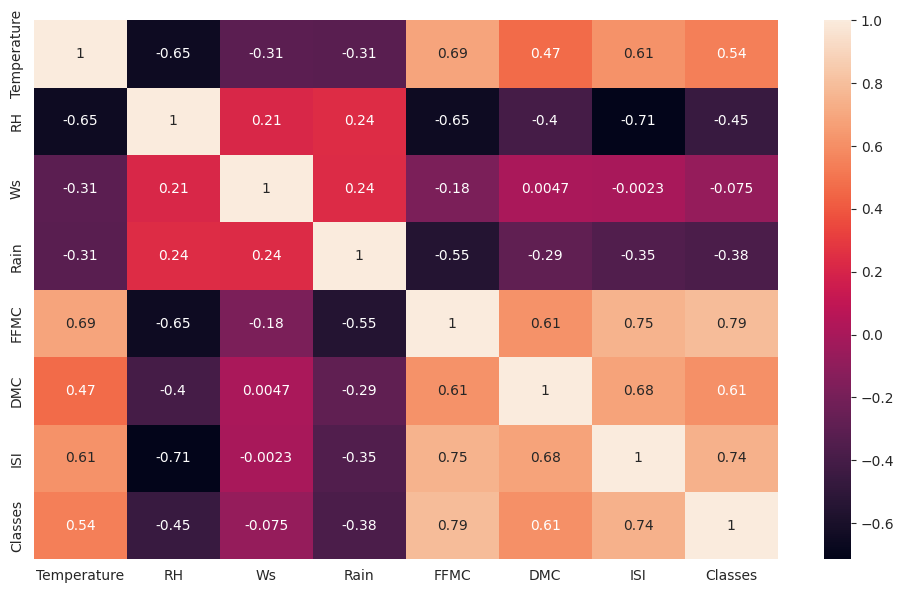

In [67]:
plt.figure(figsize=(12,7))
sns.heatmap(X_train.corr(), annot=True)

In [48]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [73]:
corr_features = correlation(X_test, 0.85)
print(corr_features)

{'DC', 'BUI'}


In [63]:
X_train.drop(corr_features, inplace=True)

In [74]:
X_test.drop(corr_features, inplace=True)

KeyError: "['DC', 'BUI'] not found in axis"

In [75]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
115,29,65,19,0.6,68.3,5.5,1.5,0
207,33,37,16,0.0,92.2,61.3,13.1,1
158,38,43,13,0.5,85.0,13.0,4.1,1
132,31,42,21,0.0,90.6,18.2,13.4,1
84,34,64,14,0.0,88.9,40.5,9.0,1


In [76]:
X_train.shape, X_test.shape

((194, 8), (49, 10))

In [77]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes'], dtype='object')

In [78]:
X_test.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes'],
      dtype='object')

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 115 to 102
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  194 non-null    int64  
 1   RH           194 non-null    int64  
 2   Ws           194 non-null    int64  
 3   Rain         194 non-null    float64
 4   FFMC         194 non-null    float64
 5   DMC          194 non-null    float64
 6   ISI          194 non-null    float64
 7   Classes      194 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 13.6 KB


In [68]:
# standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BUI
- DC
